In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd

In [2]:
temp_header = ['관리_건축물대장_PK','대장_구분_코드','대장_구분_코드_명','대장_종류_코드','대장_종류_코드_명','대지_위치','도로명_대지_위치','건물_명','시군구_코드','법정동_코드','대지_구분_코드','번','지','특수지_명','블록','로트','외필지_수','새주소_도로_코드','새주소_법정동_코드','새주소_지상지하_코드','새주소_본_번','새주소_부_번','동_명','주_부속_구분_코드','주_부속_구분_코드_명','대지_면적(㎡)','건축_면적(㎡)','건폐_율(%)','연면적(㎡)','용적_률_산정_연면적(㎡)','용적_률(%)','구조_코드','구조_코드_명','기타_구조','주_용도_코드','주_용도_코드_명','기타_용도','지붕_코드','지붕_코드_명','기타_지붕','세대_수(세대)','가구_수(가구)','높이(m)','지상_층_수','지하_층_수','승용_승강기_수','비상용_승강기_수','부속_건축물_수','부속_건축물_면적(㎡)','총_동_연면적(㎡)','옥내_기계식_대수(대)','옥내_기계식_면적(㎡)','옥외_기계식_대수(대)','옥외_기계식_면적(㎡)','옥내_자주식_대수(대)','옥내_자주식_면적(㎡)','옥외_자주식_대수(대)','옥외_자주식_면적(㎡)','허가_일','착공_일','사용승인_일','허가번호_년','허가번호_기관_코드','허가번호_기관_코드_명','허가번호_구분_코드','허가번호_구분_코드_명','호_수(호)','에너지효율_등급','에너지절감_율','에너지_EPI점수','친환경_건축물_등급','친환경_건축물_인증점수','지능형_건축물_등급','지능형_건축물_인증점수','생성_일자']

In [3]:
temp_txt = pd.read_csv("mart_djy_03.txt", encoding='cp949', dtype='str', error_bad_lines=False, sep='|', names=temp_header, header=None)

In [4]:
temp_txt.head(3)

,관리_건축물대장_PK,대장_구분_코드,대장_구분_코드_명,대장_종류_코드,대장_종류_코드_명,대지_위치,도로명_대지_위치,건물_명,시군구_코드,법정동_코드,...,허가번호_구분_코드_명,호_수(호),에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자
0,28170-23015,1,일반,2,일반건축물,인천광역시 남구 도화동 499-5번지,,NaN,28170,10500,...,NaN,0,NaN,0,0,NaN,0,NaN,0,20090317
1,28170-24111,1,일반,2,일반건축물,인천광역시 남구 도화동 647-6번지,,NaN,28170,10500,...,NaN,0,NaN,0,0,NaN,0,NaN,0,20090317
2,28170-22466,1,일반,2,일반건축물,인천광역시 남구 도화동 423-8번지,인천광역시 남구 경인남길 384,(양지께길 23),28170,10500,...,신축신고,0,NaN,0,0,NaN,0,NaN,0,20090317


In [5]:
temp_index = temp_txt[temp_txt["대지_위치"].str.contains("부산광역시", na=False)]

In [6]:
temp_index

,관리_건축물대장_PK,대장_구분_코드,대장_구분_코드_명,대장_종류_코드,대장_종류_코드_명,대지_위치,도로명_대지_위치,건물_명,시군구_코드,법정동_코드,...,허가번호_구분_코드_명,호_수(호),에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자
842,26380-33660,1,일반,2,일반건축물,부산광역시 사하구 감천동 330-5번지,부산광역시 사하구 원양로350번길 38,NaN,26380,10800,...,NaN,0,NaN,0,0,NaN,0,NaN,0,20140521
912,26470-100172244,1,일반,2,일반건축물,부산광역시 연제구 연산동 2138-41번지,부산광역시 연제구 쌍미천로 27-2,NaN,26470,10200,...,신축신고,0,NaN,0,0,NaN,0,NaN,0,20140514
942,26200-7054,1,일반,2,일반건축물,부산광역시 영도구 영선동2가 167번지,,NaN,26200,10900,...,NaN,0,NaN,0,0,NaN,0,NaN,0,20140515
1108,26470-6211,1,일반,2,일반건축물,부산광역시 연제구 연산동 333-5번지,부산광역시 연제구 고분로 48,NaN,26470,10200,...,NaN,0,NaN,0,0,NaN,0,NaN,0,20140520
1109,26530-100189952,1,일반,2,일반건축물,부산광역시 사상구 학장동 260-4번지,부산광역시 사상구 대동로 228,B동,26530,10700,...,NaN,0,NaN,0,0,NaN,0,NaN,0,20140520
1190,26530-14180,1,일반,2,일반건축물,부산광역시 사상구 감전동 130-26번지,부산광역시 사상구 새벽시장로 69-9,B동,26530,10500,...,NaN,0,NaN,0,0,NaN,0,NaN,0,20140514
1191,26530-14183,1,일반,2,일반건축물,부산광역시 사상구 감전동 130-27번지,부산광역시 사상구 새벽시장로 71,NaN,26530,10500,...,NaN,0,NaN,0,0,NaN,0,NaN,0,20140514
1192,26530-14186,1,일반,2,일반건축물,부산광역시 사상구 감전동 130-27번지,부산광역시 사상구 새벽시장로 71-4,NaN,26530,10500,...,NaN,0,NaN,0,0,NaN,0,NaN,0,20140514
1193,26530-14596,1,일반,2,일반건축물,부산광역시 사상구 감전동 145-6번지,부산광역시 사상구 새벽시장로56번가길 50-47,NaN,26530,10500,...,NaN,0,NaN,0,0,NaN,0,NaN,0,20140514
1194,26530-14612,1,일반,2,일반건축물,부산광역시 사상구 감전동 145-15번지,부산광역시 사상구 새벽시장로46번길 12,NaN,26530,10500,...,NaN,0,NaN,0,0,NaN,0,NaN,0,20140514


In [9]:
temp_index[0:1]

,관리_건축물대장_PK,대장_구분_코드,대장_구분_코드_명,대장_종류_코드,대장_종류_코드_명,대지_위치,도로명_대지_위치,건물_명,시군구_코드,법정동_코드,...,허가번호_구분_코드_명,호_수(호),에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자
842,26380-33660,1,일반,2,일반건축물,부산광역시 사하구 감천동 330-5번지,부산광역시 사하구 원양로350번길 38,NaN,26380,10800,...,NaN,0,NaN,0,0,NaN,0,NaN,0,20140521


In [26]:
tmptmp = temp_index[0:1].T

In [24]:
temp_index[0:1].T[0:1]

,842
관리_건축물대장_PK,26380-33660


In [25]:
tmp_sot_list = [0,2,4,5,6,7,24,25,26,27,28,29,30,35,36,40,41,42,43,44,47,48,49]

In [27]:
tmptmp.iloc[[0,2,4,5,6,7,24,25,26,27,28,29,30,35,36,40,41,42,43,44,47,48,49]]

,842
관리_건축물대장_PK,26380-33660
대장_구분_코드_명,일반
대장_종류_코드_명,일반건축물
대지_위치,부산광역시 사하구 감천동 330-5번지
도로명_대지_위치,부산광역시 사하구 원양로350번길 38
건물_명,NaN
주_부속_구분_코드_명,주건축물
대지_면적(㎡),0
건축_면적(㎡),0
건폐_율(%),0


In [28]:
tmptmp.iloc[[0,2,4,5,6,7,24,25,26,27,28,29,30,35,36,40,41,42,43,44,47,48,49]].to_csv('24ㅂㄱㄻㅈㄷㄱㄹ.csv', encoding='cp949')

In [ ]:
temp_index.to_csv('부산광역시.csv', encoding='cp949')

In [ ]:
temp_index = temp_txt[temp_txt["대지_위치"].str.contains("부산광역시", na=False)]

In [51]:
search_imput['시군구코드'],-',search_imput['건축물대장_PK']

(26530, '-', 16993)

In [55]:
search_imput = {'시군구코드':26530, '법정동코드':10500, '건축물대장_PK':16993}

In [56]:
def find_build_info(search_info):
    search_result = temp_index[temp_index["시군구_코드"] == str(search_imput['시군구코드'])]
    search_result = search_result[search_result["법정동_코드"] == str(search_imput['법정동코드'])]
    search_result = search_result[search_result["관리_건축물대장_PK"] 
                                  == str(search_imput['시군구코드'])+'-'+str(search_imput['건축물대장_PK'])]
    return search_result

In [57]:
find_build_info(search_imput)

,관리_건축물대장_PK,대장_구분_코드,대장_구분_코드_명,대장_종류_코드,대장_종류_코드_명,대지_위치,도로명_대지_위치,건물_명,시군구_코드,법정동_코드,...,허가번호_구분_코드_명,호_수(호),에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자
6021700,26530-16993,2,집합,3,표제부,부산광역시 사상구 감전동 132-7번지,부산광역시 사상구 대동로 303,부산디지털밸리아파트형공장,26530,10500,...,신축허가,238,NaN,0,0,NaN,0,NaN,0,20171205


In [8]:
sigungu_file = "SIG_201902/TL_SCCO_SIG.shp"
sigungu = gpd.read_file(sigungu_file, encoding='euckr')

In [7]:
dong_file = "EMD_201902/TL_SCCO_EMD.shp"
dong = gpd.read_file(dong_file, encoding='euckr')

In [19]:
sido_busan = sido[sido.CTPRVN_CD == "26"]

In [20]:
sigungu_sasang = sigungu[sigungu.SIG_CD == "26530"]

In [21]:
dong_gamjun = dong[dong.EMD_CD == "26530105"]

In [64]:
search_input = {'시군구코드':26530, '법정동코드':10500, '건축물대장_PK':16993}

In [71]:
def load_search_map(search_input):
    sido_busan = sido[sido.CTPRVN_CD == str(search_imput['시군구코드'])[:2]]
    sigungu_sasang = sigungu[sigungu.SIG_CD == str(search_imput['시군구코드'])]
    dong_gamjun = dong[dong.EMD_CD == str(search_imput['시군구코드'])+str(search_imput['법정동코드'])[:3]]
    ax = sido_busan.plot(color='w', edgecolor="k", figsize=(7,7))
    ax2 = sigungu_sasang.plot(color='w', edgecolor="b", ax = ax, figsize=(7,7))
    ax3 = dong_gamjun.plot(color='w', edgecolor="y", ax = ax2, figsize=(7,7))
    return ax3

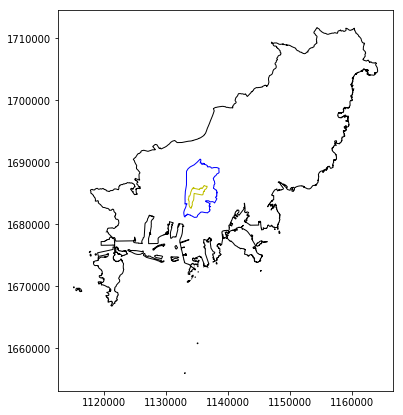

In [72]:
load_search_map(search_input)